In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from folium.plugins import FastMarkerCluster
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
vaccinetrainingdf = pd.read_csv("data/training_set_features.csv")
vaccinetestdf = pd.read_csv("data/test_set_features.csv")
vaccinelabelsdf = pd.read_csv("data/training_set_labels.csv")

In [3]:
vaccinetrainingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [4]:
vaccinetrainingdf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
vaccinetestdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [6]:
pd.set_option('max_columns', None)
vaccinetestdf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [7]:
vaccinelabelsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [8]:
vaccinelabelsdf['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [9]:
# Dropping data we deemed unnecessary/irrelevant to our business problem
columns_to_drop = ['h1n1_knowledge', 'employment_occupation', 'employment_industry', 'household_children', 'household_adults', 'census_msa', 'hhs_geo_region',
                    'employment_status', 'rent_or_own', 'marital_status', 'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'health_insurance', 'child_under_6_months',
                    'health_worker']
X_train = vaccinetrainingdf.copy().drop(columns_to_drop, axis = 1)
X_test = vaccinetestdf.copy().drop(columns_to_drop, axis = 1)
y_train = vaccinetrainingdf['h1n1_knowledge']
y_test = vaccinetestdf['h1n1_knowledge']

In [10]:
# X_train_nona = X_train.dropna()

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  opinion_h1n1_vacc_effective  26316 non-null  float64
 13  opinion_h1n1_ris

In [12]:
# X_train_nona.info()

In [13]:
# Defined a OneHotEncoder function for ease of access
def OHE(X_train, categories):
    onehot = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
    x_train_cat = pd.DataFrame(onehot.fit_transform(X_train[categories]))
    x_train_cat.columns = onehot.get_feature_names(categories)
#    x_test_cat = pd.DataFrame(onehot.transform(x_test[cat_vars]))
#    x_test_cat.columns = onehot.get_feature_names(cat_vars)
    x_train_cat.reset_index(drop=True, inplace=True)
#    x_test_cat.reset_index(drop=True, inplace=True)
    X_train.reset_index(drop=True, inplace=True)
#    x_test.reset_index(drop=True, inplace=True)
    x_train_df = X_train.drop(categories, axis = 1).join(x_train_cat)
    return x_train_df

In [14]:
X_train

,respondent_id,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty
1,1,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty
2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,3.0,1.0,1.0,4.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
3,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,65+ Years,12 Years,White,Female,Below Poverty
4,4,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty"
26703,26703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,5.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
26704,26704,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,55 - 64 Years,Some College,White,Female,NaN
26705,26705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,3.0,1.0,2.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty"


In [15]:
y_train.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   behavioral_antiviral_meds    26629 non-null  float64
 3   behavioral_avoidance         26495 non-null  float64
 4   behavioral_face_mask         26689 non-null  float64
 5   behavioral_wash_hands        26668 non-null  float64
 6   behavioral_large_gatherings  26636 non-null  float64
 7   behavioral_outside_home      26626 non-null  float64
 8   behavioral_touch_face        26580 non-null  float64
 9   doctor_recc_h1n1             24548 non-null  float64
 10  doctor_recc_seasonal         24548 non-null  float64
 11  chronic_med_condition        25776 non-null  float64
 12  opinion_h1n1_vacc_effective  26310 non-null  float64
 13  opinion_h1n1_ris

In [17]:
# Created a SimpleImputer to replace the NaN values with the most_frequent(mode) values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
imputed_X_train = imputer.fit_transform(X_train)
imputed_X_train_df = pd.DataFrame(imputed_X_train)

In [18]:
imputed_X_test = imputer.transform(X_test)
imputed_X_test_df = pd.DataFrame(imputed_X_test)
imputed_X_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,26707,2,0,1,0,1,1,0,1,0,0,0,5,1,1,5,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000"
1,26708,1,0,0,0,0,0,0,0,0,0,0,4,1,1,4,18 - 34 Years,12 Years,White,Male,Below Poverty
2,26709,2,0,0,1,1,1,1,1,0,0,0,5,4,2,5,55 - 64 Years,College Graduate,White,Male,"> $75,000"
3,26710,1,0,0,0,0,0,0,0,1,1,1,4,2,2,4,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty"
4,26711,3,1,1,0,1,1,1,1,0,0,0,5,2,4,4,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1,0,1,0,1,0,0,1,1,1,0,4,2,2,4,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty"
26704,53411,3,0,1,0,1,1,1,1,0,0,0,4,1,1,5,18 - 34 Years,12 Years,White,Male,Below Poverty
26705,53412,0,0,0,0,0,0,0,0,0,0,0,4,3,1,4,18 - 34 Years,Some College,White,Female,Below Poverty
26706,53413,3,0,1,0,1,0,1,0,0,0,0,2,3,4,4,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty"


In [19]:
# Created a dictionary of names to rename the columns after imputing
dictionary_of_names = {0: 'respondent_id', 1:'h1n1_concern', 2:'behavioral_antiviral_meds',
                       3:'behavioral_avoidance',4:'behavioral_face_mask',5:'behavioral_wash_hands',
                       6:'behavioral_large_gatherings',7:'behavioral_outside_home',8:'behavioral_touch_face',
                       9:'doctor_recc_h1n1',10:'doctor_recc_seasonal',11:'chronic_med_condition',
                      12:'opinion_h1n1_vacc_effective', 13:'opinion_h1n1_risk', 14:'opinion_h1n1_sick_from_vacc',
                       15:'opinion_seas_vacc_effective', 16:'age_group', 17:'education', 18:'race', 19:'sex', 20:'income_poverty'}
imputed_X_train_df_plus_column_names = imputed_X_train_df.rename(dictionary_of_names, axis = 1)
imputed_X_test_df_plus_column_names = imputed_X_test_df.rename(dictionary_of_names, axis = 1)

In [20]:
imputed_X_test_df_plus_column_names

,respondent_id,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,26707,2,0,1,0,1,1,0,1,0,0,0,5,1,1,5,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000"
1,26708,1,0,0,0,0,0,0,0,0,0,0,4,1,1,4,18 - 34 Years,12 Years,White,Male,Below Poverty
2,26709,2,0,0,1,1,1,1,1,0,0,0,5,4,2,5,55 - 64 Years,College Graduate,White,Male,"> $75,000"
3,26710,1,0,0,0,0,0,0,0,1,1,1,4,2,2,4,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty"
4,26711,3,1,1,0,1,1,1,1,0,0,0,5,2,4,4,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1,0,1,0,1,0,0,1,1,1,0,4,2,2,4,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty"
26704,53411,3,0,1,0,1,1,1,1,0,0,0,4,1,1,5,18 - 34 Years,12 Years,White,Male,Below Poverty
26705,53412,0,0,0,0,0,0,0,0,0,0,0,4,3,1,4,18 - 34 Years,Some College,White,Female,Below Poverty
26706,53413,3,0,1,0,1,0,1,0,0,0,0,2,3,4,4,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty"


In [21]:
imputed_X_train_df_plus_column_names

,respondent_id,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,0,1,0,0,0,0,0,1,1,0,0,0,3,1,2,2,55 - 64 Years,< 12 Years,White,Female,Below Poverty
1,1,3,0,1,0,1,0,1,1,0,0,0,5,4,4,4,35 - 44 Years,12 Years,White,Male,Below Poverty
2,2,1,0,1,0,0,0,0,0,0,0,1,3,1,1,4,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
3,3,1,0,1,0,1,1,0,0,0,1,1,3,3,5,5,65+ Years,12 Years,White,Female,Below Poverty
4,4,2,0,1,0,1,1,0,1,0,0,0,3,3,2,3,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2,0,1,0,0,0,1,0,0,0,0,3,1,1,5,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty"
26703,26703,1,0,1,0,1,0,0,0,1,1,0,4,2,2,5,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
26704,26704,2,0,1,1,1,1,0,1,0,0,0,4,4,2,5,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty"
26705,26705,1,0,0,0,0,0,0,1,0,0,0,3,1,2,2,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty"


In [22]:
#X_train_column_names = X_train.columns.values.tolist()
#type(X_train_column_names)
#list_of_numbers = list(range(0, 21))
#list_of_numbers

In [23]:
#dictionary_of_names = {key: X_train_column_names[0] for key in list_of_numbers}
#dictionary_of_names

In [24]:
#X_train_column_names

In [25]:
imputeddf_array = imputed_X_train_df_plus_column_names.to_numpy()
type(imputeddf_array)

numpy.ndarray

In [26]:
X_train

,respondent_id,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty
1,1,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty
2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,3.0,1.0,1.0,4.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
3,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,65+ Years,12 Years,White,Female,Below Poverty
4,4,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty"
26703,26703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,5.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
26704,26704,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,55 - 64 Years,Some College,White,Female,NaN
26705,26705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,3.0,1.0,2.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty"


In [27]:
X_train

,respondent_id,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty
1,1,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty
2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,3.0,1.0,1.0,4.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
3,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,65+ Years,12 Years,White,Female,Below Poverty
4,4,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty"
26703,26703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,5.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
26704,26704,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,55 - 64 Years,Some College,White,Female,NaN
26705,26705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,3.0,1.0,2.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty"


In [28]:
'''from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#pd.DataFrame(onehot.fit_transform(x_train[cat_vars]))
ohetraining = pd.DataFrame(encoder.fit_transform(imputeddf[['age_group', 'education', 'race', 'sex]]))
'''

"from sklearn.preprocessing import OneHotEncoder\nencoder = OneHotEncoder()\n#pd.DataFrame(onehot.fit_transform(x_train[cat_vars]))\nohetraining = pd.DataFrame(encoder.fit_transform(imputeddf[['age_group', 'education', 'race', 'sex]]))\n"

In [29]:
# Called the OHE function we made and assigned new dataframe variables
ohe_training_df = OHE(imputed_X_train_df_plus_column_names, ['age_group', 'education','race', 'sex', 'income_poverty'])
ohe_test_df = OHE(imputed_X_test_df_plus_column_names, ['age_group', 'education','race', 'sex', 'income_poverty'])
ohe_training_df

,respondent_id,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty
0,0,1,0,0,0,0,0,1,1,0,0,0,3,1,2,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1,3,0,1,0,1,0,1,1,0,0,0,5,4,4,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2,1,0,1,0,0,0,0,0,0,0,1,3,1,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,3,1,0,1,0,1,1,0,0,0,1,1,3,3,5,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,4,2,0,1,0,1,1,0,1,0,0,0,3,3,2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2,0,1,0,0,0,1,0,0,0,0,3,1,1,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
26703,26703,1,0,1,0,1,0,0,0,1,1,0,4,2,2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
26704,26704,2,0,1,1,1,1,0,1,0,0,0,4,4,2,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
26705,26705,1,0,0,0,0,0,0,1,0,0,0,3,1,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [30]:
X_train['age_group'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [31]:
X_train['education'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [32]:
X_train['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [33]:
X_train['sex'].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [34]:
X_train['income_poverty'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

X_train = imputeddf_array
dummy.score(X, y_pred)

In [35]:
# Instead of calling SimpleImputer/removing the NaN variables in the target column, we performed an imputation which replaced all the NaN values with the most frequent value
# which in this case would be 1.0 (little knowledge of vaccine)
y_train.replace(np.nan, 1.0, inplace = True)
y_test.replace(np.nan, 1.0, inplace = True)

In [36]:
y_test.isna().value_counts()

False    26708
Name: h1n1_knowledge, dtype: int64

In [37]:
y_train.isna().value_counts()

False    26707
Name: h1n1_knowledge, dtype: int64

In [38]:
'''h1n1_bin = vaccinetrainingdf[['h1n1_knowledge']]
bins = [0,1]
h1n1_bin['bins'] = pd.cut(x=h1n1_bin['h1n1_knowledge'], bins=bins)'''

"h1n1_bin = vaccinetrainingdf[['h1n1_knowledge']]\nbins = [0,1]\nh1n1_bin['bins'] = pd.cut(x=h1n1_bin['h1n1_knowledge'], bins=bins)"

In [39]:
#h1n1_bin['bins']

In [40]:
# Created Dummy Classifier model to look at simple accuracy score
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(imputed_X_train_df_plus_column_names, y_train)
y_pred = dummy.predict(X_train)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.value_counts()
dummy.score(ohe_test_df, y_test)

C:\Users\Beter\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


0.44301332933952375

In [41]:
# Displayed cross validation score for the dummy model
from sklearn.model_selection import train_test_split, cross_val_score

dummy_cross_val = cross_val_score(dummy, imputed_X_train_df_plus_column_names, y_pred_df)

dummy_cross_val

C:\Users\Beter\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


array([0.43279671, 0.43616623, 0.44092867, 0.44261374, 0.43980528])

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier (random_state = 10)
dt.fit(ohe_training_df, y_train)
dt.score(ohe_test_df, y_test)

0.42418002096750035

In [43]:
# Created grid paramater to perform a GridSearch to find optimal decision tree parameters
grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [100, 500, 1000, 5000],
    'min_samples_leaf': [100, 500, 1000, 5000]
}

gs = GridSearchCV(estimator = dt, param_grid = grid, cv = 5)
gs.fit(ohe_training_df, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [100, 500, 1000, 5000],
                         'min_samples_split': [100, 500, 1000, 5000]})

In [44]:
gs.best_params_

{'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 500}

In [45]:
gs.best_score_

0.5872244487186883

In [46]:
gs.best_estimator_.score(ohe_test_df, y_test)


0.5770930058409466

In [47]:
gs.n_features_in_

34

In [48]:
gs.cv_results_


{'mean_fit_time': array([0.05462203, 0.06063733, 0.05904207, 0.05435038, 0.06214342,
        0.05828829, 0.05086374, 0.05683169, 0.05295458, 0.0490489 ,
        0.0490684 , 0.04947324, 0.04766703, 0.04710259, 0.05177932,
        0.05225964, 0.05627251, 0.05747766, 0.05566368, 0.05624847,
        0.06242747, 0.0609252 , 0.05660515, 0.05882564, 0.05583544,
        0.05863762, 0.05723381, 0.06382885, 0.05645967, 0.0606319 ,
        0.0568584 , 0.05624919, 0.06543045, 0.06433406, 0.06172719,
        0.05985861, 0.06103635, 0.06203976, 0.06077156, 0.06782422,
        0.06682153, 0.06044436, 0.06067719, 0.05903487, 0.05006151,
        0.05025997, 0.05161052, 0.04985185, 0.06882715, 0.06831222,
        0.07518549, 0.06175313, 0.07141352, 0.06914434, 0.06849747,
        0.06323714, 0.06603365, 0.072755  , 0.07285681, 0.07041688,
        0.05006027, 0.05007768, 0.05078359, 0.05325131, 0.07899737,
        0.07629781, 0.07419777, 0.06372914, 0.07639465, 0.08038497,
        0.0754868 , 0.06204658,

In [49]:
# Converted the results from the GridSearch to a DataFrame for easier visualization
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054622,0.004003,0.012296,0.001471,1,100,100,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.550917,0.550917,0.550833,0.551020,0.551020,0.550942,0.000071,109
1,0.060637,0.006835,0.012567,0.002863,1,100,500,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.550917,0.550917,0.550833,0.551020,0.551020,0.550942,0.000071,109
2,0.059042,0.005022,0.011170,0.000399,1,100,1000,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.550917,0.550917,0.550833,0.551020,0.551020,0.550942,0.000071,109
3,0.054350,0.004633,0.010975,0.001789,1,100,5000,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.550917,0.550917,0.550833,0.551020,0.551020,0.550942,0.000071,109
4,0.062143,0.006787,0.013564,0.002646,1,500,100,"{'max_depth': 1, 'min_samples_leaf': 500, 'min...",0.550917,0.550917,0.550833,0.551020,0.551020,0.550942,0.000071,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.068410,0.004449,0.012961,0.002682,10,1000,5000,"{'max_depth': 10, 'min_samples_leaf': 1000, 'm...",0.572070,0.578435,0.579479,0.569931,0.586033,0.577190,0.005725,74
156,0.052027,0.001697,0.009763,0.000380,10,5000,100,"{'max_depth': 10, 'min_samples_leaf': 5000, 'm...",0.550917,0.550917,0.550833,0.551020,0.551020,0.550942,0.000071,109
157,0.050897,0.000669,0.010761,0.000759,10,5000,500,"{'max_depth': 10, 'min_samples_leaf': 5000, 'm...",0.550917,0.550917,0.550833,0.551020,0.551020,0.550942,0.000071,109
158,0.052247,0.001344,0.010178,0.000396,10,5000,1000,"{'max_depth': 10, 'min_samples_leaf': 5000, 'm...",0.550917,0.550917,0.550833,0.551020,0.551020,0.550942,0.000071,109


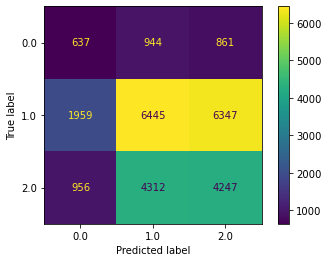

In [50]:
# Plotted confusion matrix for easier visualization of our predictions of our target variable.
plot_confusion_matrix(dt, ohe_test_df, y_test);